# Applying predictions to new data

In [1]:
import joblib
clf=joblib.load('decisiontree.p')

In [2]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline


In [3]:
newloans=pd.read_csv('new_loans.csv')

In [4]:
newloans

,id,member_id,loan_amnt,funded_amnt,term,int_rate,exp_default_rate,service_fee_rate,installment,grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,111876788,120425507,2000.0,1650.0,36,7.21,2.06,0.81,61.95,A,...,,,,,,,,,,
1,111868402,120417120,9000.0,8650.0,36,11.99,3.99,0.93,298.89,B,...,,,,,,,,,,
2,112017019,120565736,8000.0,7125.0,36,14.08,6.59,1.05,273.74,C,...,,,,,,,,,,
3,111549780,120064497,7800.0,4875.0,36,21.45,10.49,1.24,295.68,D,...,,,,,,,,,,
4,111718954,120270828,12000.0,9100.0,36,16.02,6.59,1.05,422.01,C,...,,,,,,,,,,
5,112705560,121335400,13000.0,12025.0,36,18.06,10.49,1.24,470.38,D,...,,,,,,,,,,
6,112722043,121351760,4000.0,2825.0,36,7.21,2.06,0.81,123.90,A,...,,,,,,,,,,
7,112156293,120758009,6000.0,3550.0,36,19.03,10.49,1.24,220.03,D,...,,,,,,,,,,
8,112443397,121071017,4475.0,4325.0,36,15.05,6.59,1.05,155.24,C,...,,,,,,,,,,
9,112888880,121535600,9250.0,8925.0,36,13.59,6.59,1.05,314.31,C,...,,,,,,,,,,


In [5]:
newloans=newloans.query('purpose=="Credit card refinancing"|purpose=="Debt consolidation"')
newloans=newloans.query('term==36')

In [6]:
finalkeep=['id','int_rate','loan_amnt','installment', 'emp_length', 'home_ownership',
       'annual_inc','purpose',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths','open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc','collections_12_mths_ex_med']
final=newloans[finalkeep].copy()

In [7]:
keepfeat=['loan_amnt', 'emp_length', 'home_ownership',
       'annual_inc','purpose',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths','open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc','collections_12_mths_ex_med']
newloans=newloans[keepfeat]

newloans.head(n=10)

,loan_amnt,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med
0,2000.0,7 years,MORTGAGE,90000.0,Credit card refinancing,23.91,1,06-24-2007 17:00:00,0,10,0,5524.0,32.1,17,0
1,9000.0,9 years,MORTGAGE,65000.0,Debt consolidation,21.01,5,08-25-1991 17:00:00,0,13,0,3685.0,15.2,39,0
3,7800.0,n/a,RENT,29135.0,Debt consolidation,29.38,0,09-18-1999 17:00:00,0,5,0,675.0,18.8,44,0
5,13000.0,3 years,RENT,46000.0,Credit card refinancing,17.01,0,10-29-2013 17:00:00,0,5,0,12466.0,79.9,7,0
7,6000.0,< 1 year,RENT,30000.0,Debt consolidation,10.92,2,07-29-2004 17:00:00,0,7,0,3247.0,44.5,16,0
8,4475.0,9 years,RENT,35000.0,Credit card refinancing,17.97,0,11-07-2013 16:00:00,1,7,0,3929.0,43.7,9,0
9,9250.0,n/a,OWN,48000.0,Debt consolidation,31.12,3,12-07-1993 16:00:00,2,17,0,11082.0,34.2,34,0
10,4300.0,n/a,RENT,12000.0,Credit card refinancing,14.90,0,07-29-2000 17:00:00,1,8,1,3763.0,54.5,24,0
11,7000.0,n/a,RENT,24708.0,Debt consolidation,10.20,0,12-25-1997 16:00:00,0,5,1,6497.0,52.4,9,0
12,23650.0,10+ years,MORTGAGE,529000.0,Credit card refinancing,21.67,0,03-23-1997 16:00:00,0,22,0,312921.0,49.0,38,0


## change dates

In [8]:
newloans['earliest_cr_line']=pd.to_datetime(newloans.earliest_cr_line, format='%m-%d-%Y %H:%M:%S')
newloans['earliest_cr_line']=newloans.earliest_cr_line.dt.year
newloans.earliest_cr_line.head(n=10)


0     2007
1     1991
3     1999
5     2013
7     2004
8     2013
9     1993
10    2000
11    1997
12    1997
Name: earliest_cr_line, dtype: int64

In [9]:
newloans.emp_length=newloans.emp_length.str.replace(' year','')
newloans.emp_length=newloans.emp_length.str.replace('s','')
newloans.emp_length=newloans.emp_length.str.replace('+','')
newloans.emp_length=newloans.emp_length.str.replace('< 1','0.5')
newloans.emp_length=newloans.emp_length.str.replace('n/a','0')
newloans.emp_length=newloans.emp_length.apply(pd.to_numeric)
newloans.emp_length.dtype

dtype('float64')

In [10]:
newloans

,loan_amnt,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med
0,2000.0,7.0,MORTGAGE,90000.0,Credit card refinancing,23.91,1,2007,0,10,0,5524.0,32.1,17,0
1,9000.0,9.0,MORTGAGE,65000.0,Debt consolidation,21.01,5,1991,0,13,0,3685.0,15.2,39,0
3,7800.0,0.0,RENT,29135.0,Debt consolidation,29.38,0,1999,0,5,0,675.0,18.8,44,0
5,13000.0,3.0,RENT,46000.0,Credit card refinancing,17.01,0,2013,0,5,0,12466.0,79.9,7,0
7,6000.0,0.5,RENT,30000.0,Debt consolidation,10.92,2,2004,0,7,0,3247.0,44.5,16,0
8,4475.0,9.0,RENT,35000.0,Credit card refinancing,17.97,0,2013,1,7,0,3929.0,43.7,9,0
9,9250.0,0.0,OWN,48000.0,Debt consolidation,31.12,3,1993,2,17,0,11082.0,34.2,34,0
10,4300.0,0.0,RENT,12000.0,Credit card refinancing,14.90,0,2000,1,8,1,3763.0,54.5,24,0
11,7000.0,0.0,RENT,24708.0,Debt consolidation,10.20,0,1997,0,5,1,6497.0,52.4,9,0
12,23650.0,10.0,MORTGAGE,529000.0,Credit card refinancing,21.67,0,1997,0,22,0,312921.0,49.0,38,0


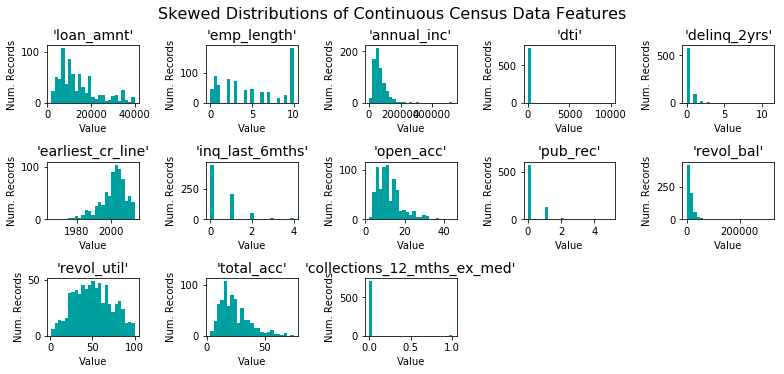

In [11]:
import imp
imp.reload(vs)
vs.distribution(newloans)

## remove skew

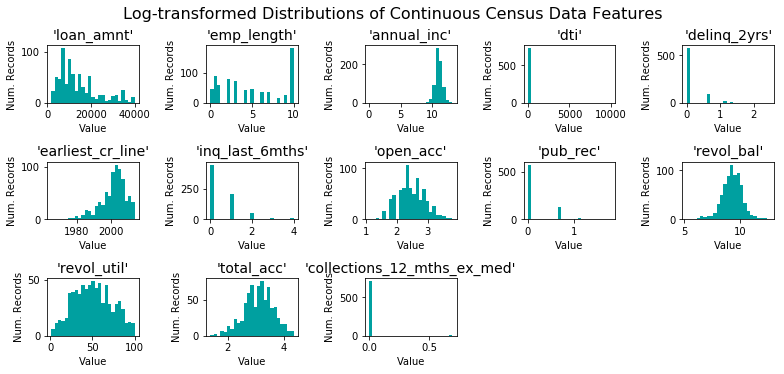

In [12]:
skewed = ['annual_inc','delinq_2yrs','open_acc', 'pub_rec','revol_bal','total_acc', 'collections_12_mths_ex_med']
newloans_raw=newloans.copy()
newloans_raw[skewed] = newloans[skewed].apply(lambda x: np.log(x + 1))
imp.reload(vs)
vs.distribution(newloans_raw, transformed = True)

## normalize

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['loan_amnt','emp_length', 'annual_inc','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc', 'pub_rec','revol_bal','revol_util','total_acc', 'collections_12_mths_ex_med']
newloans_raw[numerical] = scaler.fit_transform(newloans_raw[numerical])

# Show an example of a record with scaling applied
display(newloans_raw.head(n = 10))


,loan_amnt,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med
0,0.000000,0.70,MORTGAGE,0.865604,Credit card refinancing,0.002240,0.278943,0.857143,0.00,0.479785,0.000000,0.458143,0.311111,0.510820,0.0
1,0.184211,0.90,MORTGAGE,0.840911,Debt consolidation,0.001949,0.721057,0.530612,0.00,0.568839,0.000000,0.403813,0.140404,0.782011,0.0
3,0.152632,0.00,RENT,0.780023,Debt consolidation,0.002787,0.000000,0.693878,0.00,0.255958,0.000000,0.176139,0.176768,0.822013,0.0
5,0.289474,0.30,RENT,0.814677,Credit card refinancing,0.001549,0.000000,0.979592,0.00,0.255958,0.000000,0.567383,0.793939,0.235409,0.0
7,0.105263,0.05,RENT,0.782243,Debt consolidation,0.000940,0.442114,0.795918,0.00,0.362190,0.000000,0.386833,0.436364,0.491407,0.0
8,0.065132,0.90,RENT,0.793940,Credit card refinancing,0.001645,0.000000,0.979592,0.25,0.362190,0.000000,0.412418,0.428283,0.311194,0.0
9,0.190789,0.00,OWN,0.817906,Debt consolidation,0.002961,0.557886,0.571429,0.50,0.661642,0.000000,0.551587,0.332323,0.736661,0.0
10,0.060526,0.00,RENT,0.712719,Credit card refinancing,0.001338,0.000000,0.714286,0.25,0.405684,0.386853,0.406624,0.537374,0.622387,0.0
11,0.131579,0.00,RENT,0.767518,Debt consolidation,0.000868,0.000000,0.653061,0.00,0.255958,0.386853,0.479918,0.516162,0.311194,0.0
12,0.569737,1.00,MORTGAGE,1.000000,Credit card refinancing,0.002016,0.000000,0.653061,0.00,0.752158,0.000000,1.000000,0.481818,0.773413,0.0


## one hot encode

In [14]:
newloans_raw.replace("Credit card refinancing",'credit_card',inplace=True)
newloans_raw.replace("Debt consolidation",'debt_consolidation',inplace=True)

In [15]:
feat = pd.get_dummies(newloans_raw)


#print(income.head(n=10))
# Print the number of features after one-hot encoding
encoded = list(feat.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

18 total features after one-hot encoding.
['loan_amnt', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'purpose_credit_card', 'purpose_debt_consolidation']


In [16]:
newloans_raw.head(10)

,loan_amnt,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med
0,0.000000,0.70,MORTGAGE,0.865604,credit_card,0.002240,0.278943,0.857143,0.00,0.479785,0.000000,0.458143,0.311111,0.510820,0.0
1,0.184211,0.90,MORTGAGE,0.840911,debt_consolidation,0.001949,0.721057,0.530612,0.00,0.568839,0.000000,0.403813,0.140404,0.782011,0.0
3,0.152632,0.00,RENT,0.780023,debt_consolidation,0.002787,0.000000,0.693878,0.00,0.255958,0.000000,0.176139,0.176768,0.822013,0.0
5,0.289474,0.30,RENT,0.814677,credit_card,0.001549,0.000000,0.979592,0.00,0.255958,0.000000,0.567383,0.793939,0.235409,0.0
7,0.105263,0.05,RENT,0.782243,debt_consolidation,0.000940,0.442114,0.795918,0.00,0.362190,0.000000,0.386833,0.436364,0.491407,0.0
8,0.065132,0.90,RENT,0.793940,credit_card,0.001645,0.000000,0.979592,0.25,0.362190,0.000000,0.412418,0.428283,0.311194,0.0
9,0.190789,0.00,OWN,0.817906,debt_consolidation,0.002961,0.557886,0.571429,0.50,0.661642,0.000000,0.551587,0.332323,0.736661,0.0
10,0.060526,0.00,RENT,0.712719,credit_card,0.001338,0.000000,0.714286,0.25,0.405684,0.386853,0.406624,0.537374,0.622387,0.0
11,0.131579,0.00,RENT,0.767518,debt_consolidation,0.000868,0.000000,0.653061,0.00,0.255958,0.386853,0.479918,0.516162,0.311194,0.0
12,0.569737,1.00,MORTGAGE,1.000000,credit_card,0.002016,0.000000,0.653061,0.00,0.752158,0.000000,1.000000,0.481818,0.773413,0.0


In [17]:
final['predictedclass']=clf.predict(feat)

In [18]:
goodloans=final.query('predictedclass==1')

In [19]:
goodloans.head(10)

,id,int_rate,loan_amnt,installment,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,predictedclass
0,111876788,7.21,2000.0,61.95,7 years,MORTGAGE,90000.0,Credit card refinancing,23.91,1,06-24-2007 17:00:00,0,10,0,5524.0,32.1,17,0,1
3,111549780,21.45,7800.0,295.68,n/a,RENT,29135.0,Debt consolidation,29.38,0,09-18-1999 17:00:00,0,5,0,675.0,18.8,44,0,1
9,112888880,13.59,9250.0,314.31,n/a,OWN,48000.0,Debt consolidation,31.12,3,12-07-1993 16:00:00,2,17,0,11082.0,34.2,34,0,1
10,112706451,15.05,4300.0,149.17,n/a,RENT,12000.0,Credit card refinancing,14.90,0,07-29-2000 17:00:00,1,8,1,3763.0,54.5,24,0,1
12,112050937,7.35,23650.0,734.04,10+ years,MORTGAGE,529000.0,Credit card refinancing,21.67,0,03-23-1997 16:00:00,0,22,0,312921.0,49.0,38,0,1
15,112762391,20.00,5000.0,185.82,5 years,RENT,92000.0,Debt consolidation,12.34,0,04-05-2003 16:00:00,0,4,1,447.0,49.7,7,0,1
18,113065122,16.02,8000.0,281.34,< 1 year,RENT,33000.0,Debt consolidation,11.56,0,01-08-1998 16:00:00,0,15,1,5079.0,22.9,31,0,1
26,112711315,15.05,24000.0,832.56,5 years,RENT,185000.0,Debt consolidation,8.63,0,11-30-2011 16:00:00,0,7,0,11773.0,21.8,7,0,1
32,113072246,13.59,10000.0,339.79,10+ years,MORTGAGE,55000.0,Debt consolidation,10.58,0,02-09-2013 16:00:00,1,9,0,4892.0,74.1,12,0,1
34,111863089,16.02,15000.0,527.51,< 1 year,RENT,50000.0,Credit card refinancing,27.53,0,03-27-2011 17:00:00,0,15,0,12938.0,55.8,21,0,1


In [20]:
goodloans.sort_values('int_rate',ascending=False)

,id,int_rate,loan_amnt,installment,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,predictedclass
390,113088975,30.84,25825.0,1108.23,< 1 year,MORTGAGE,64000.0,Debt consolidation,32.55,1,07-09-1984 17:00:00,1,10,0,56948.0,33.6,18,0,1
481,111630307,30.84,26625.0,1142.56,10+ years,MORTGAGE,77000.0,Credit card refinancing,34.10,0,10-08-2001 17:00:00,1,17,0,25388.0,59.0,36,0,1
426,112809805,30.84,15000.0,643.70,10+ years,RENT,60000.0,Debt consolidation,24.54,0,05-09-2001 17:00:00,1,9,1,18630.0,77.3,22,0,1
746,113536597,29.69,12000.0,507.39,8 years,RENT,85000.0,Debt consolidation,21.84,0,05-16-2004 17:00:00,3,16,0,24183.0,43.3,21,0,1
870,112380974,26.30,22175.0,897.00,7 years,RENT,50400.0,Debt consolidation,16.86,0,12-11-2007 16:00:00,1,8,0,7904.0,51.0,17,0,1
751,113515708,26.30,12000.0,485.41,3 years,RENT,110000.0,Debt consolidation,24.85,1,07-15-1985 17:00:00,3,17,3,12304.0,33.6,24,0,1
977,113487906,25.82,35000.0,1406.82,< 1 year,MORTGAGE,49940.0,Debt consolidation,36.82,0,03-13-2001 16:00:00,1,7,1,14566.0,55.2,23,0,1
72,113228593,25.82,3000.0,120.59,< 1 year,RENT,48000.0,Debt consolidation,21.65,0,11-13-2011 16:00:00,1,5,0,4466.0,99.2,7,0,1
947,113154870,25.82,32075.0,1289.25,2 years,MORTGAGE,69757.0,Credit card refinancing,29.73,0,07-11-2002 17:00:00,3,44,1,47003.0,42.9,57,0,1
681,113511023,24.85,8500.0,337.29,9 years,MORTGAGE,125000.0,Debt consolidation,6.59,0,07-15-2004 17:00:00,1,14,3,8413.0,13.4,17,0,1
